In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import sympy as sp
import matplotlib as mpl
from   datetime import datetime,timedelta
import glob
import statsmodels.api as sm
import sys

In [2]:
plt.style.use('seaborn-paper')
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['font.sans-serif'] = "Century Gothic"
mpl.rcParams['font.family'] = "Century Gothic"
mpl.rcParams['font.weight'] = 'normal'

In [5]:
paths = glob.glob(r"E:\Documentos\Universidad Nacional\MAESTRIA\DELFT3D\PRE_DELFT3D\CODIGOS\*.dat")

In [7]:
paths[0]

'E:\\Documentos\\Universidad Nacional\\MAESTRIA\\DELFT3D\\PRE_DELFT3D\\CODIGOS\\saliniry_exp_file.dat'

In [19]:
data_Sal_test6=pd.read_csv(paths[0],delimiter='\s+',header=5,encoding =  'unicode_escape',
                     names=["Date","Time","Salinity","Z"])
data_Sal_test6

In [26]:
data_temp_test6=pd.read_csv(paths[1],delimiter='\s+',header=5,encoding =  'unicode_escape',
                     names=["Date","Time","Temperature","Z"])

In [27]:
data_temp_test6

,Date,Time,Temperature,Z
0,20210603,0,27.3000,0.300000
1,20210603,500,27.2933,-22.074200
2,20210603,1000,27.2876,0.300210
3,20210603,1500,27.2828,-22.074200
4,20210603,2000,27.2786,0.300616
...,...,...,...,...
68,20210603,54000,27.2456,0.047756
69,20210603,54500,27.2456,-22.074200
70,20210603,55000,27.2456,0.034932
71,20210603,55500,27.2456,-22.074200


In [21]:
in_swan = datetime(2018,5,15,0)      # Incio de almacenamiento de datos de SWAN
fin_swan = datetime(2018,5,15,6)    # Fin de almacenamiento de datos de SWAN
escala_temporal = 5               # resolución temporal en minutos
minutes_swan =int((fin_swan-in_swan).days*24 + (fin_swan-in_swan).seconds/3600)*60+escala_temporal  # minutos de almacenamiento en swan
time = np.array([in_swan + timedelta(minutes=m) for m in range(0,int(minutes_swan),escala_temporal)]) # Vector de timepos por hora, como se registro con Swan

In [24]:
df_salinity = pd.DataFrame(data=data_Sal_test6['Salinity'].values,index= time,columns=['Salinity']) 

In [23]:
time.shape

(73,)

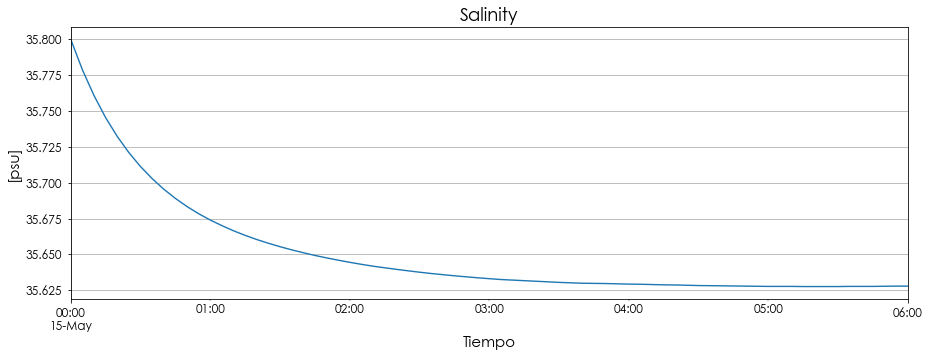

In [25]:
plt.figure(figsize=(5,3))
df_salinity['Salinity'].plot(figsize=(15, 5), fontsize=12)
plt.xlabel('Tiempo',size=15)
plt.ylabel('[psu]',size=15)
plt.title('Salinity',size = 18)
plt.grid(True)
# ruta = str('E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/')  #Ruta para guardar la imagen  
# plt.savefig(ruta+str('serie_')+title+str('.png'),dpi=300,bbox_inches='tight',pad_inches=0)

In [28]:
df_temperature = pd.DataFrame(data=data_temp_test6['Temperature'].values,index= time,columns=['Temperature']) 

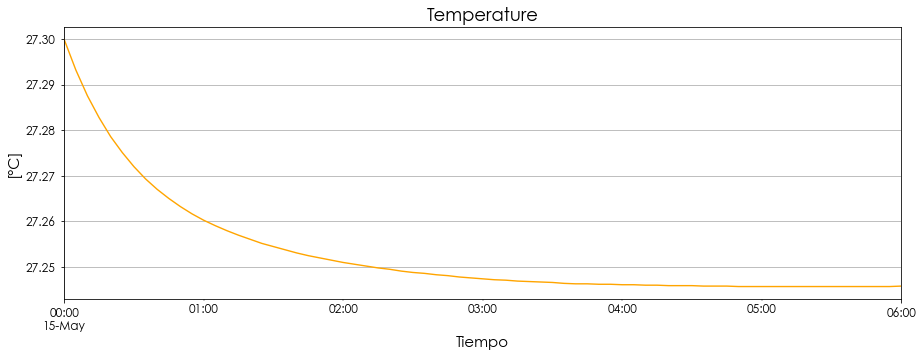

In [29]:
plt.figure(figsize=(5,3))
df_temperature['Temperature'].plot(figsize=(15, 5), fontsize=12,color='orange')
plt.xlabel('Tiempo',size=15)
plt.ylabel('[°C]',size=15)
plt.title('Temperature',size = 18)
plt.grid(True)
# ruta = str('E:/Documentos/Universidad Nacional/TDG_Paula/SWAN/')  #Ruta para guardar la imagen  
# plt.savefig(ruta+str('serie_')+title+str('.png'),dpi=300,bbox_inches='tight',pad_inches=0)

In [ ]:
# Salinidad en un punto 
# hourticks = ((time[-1]-time[0]).days*24 +(time[-1]-time[0]).seconds/3600+5)
# xticks_time = np.array([time[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/5))])
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(time, salt[:,0,0,0])
ax.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%m-%d %H')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel ('Date',size=15)
ax.set_ylabel ('Salinidad [psu]',size=15)
plt.xticks(rotation=30)
ax.grid(True)
ax.set_title('Salinidad',size=15)